In [97]:
#homework 10
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import csv

A virus is coming where 50% of the cryptopunks will have contracted a disease where they get a white spot. The code below generates the disease. Your job is as follows

Generate the data as below
Train a convolutional neural network to classify punks as diseased or not
1. Create training and validation sets. Contrast in the sensitivity, specificity and accuracy in both sets.
2. Visualize some of your algorithm's mistakes (in both directions) and describe what is happening. In other words, consider punks declared very likely to have a cancer that did not and ones that did not have a cancer that it declared very likely that they did. Plot those. Is there a reason why it seems like it's so wrong for these cases?
3. Create a python function that takes in an np image array just like the cancerpunks one below and gives probabilities that that punk has this disease.

In [98]:

import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, losses

## Open the image
imgURL = "https://raw.githubusercontent.com/larvalabs/cryptopunks/master/punks.png"
urllib.request.urlretrieve(imgURL, "cryptoPunksAll.jpg")
img = PIL.Image.open("cryptoPunksAll.jpg").convert("RGB")
imgArray = np.asarray(img)

n = 10000

finalArray = np.empty((n, 24, 24, 3))
for i in range(100):
  for j in range(100):
    a, b = 24 * i, 24 * (i + 1)  
    c, d = 24 * j, 24 * (j + 1) 
    idx = j + i * (100)
    finalArray[idx,:,:,:] = imgArray[a:b,c:d,:]


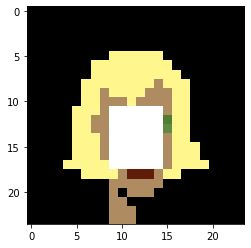

In [99]:

temp  =  finalArray[0,:,:,:].copy()

d2min, d2max = 9,14 
d1min, d1max = 11,17

temp[d1min : (d1max + 1), d2min : (d2max + 1)] = 255

plt.imshow(temp.astype('uint8'))



Our doctors have determined this is the region where the lesion occurs.

In [100]:
cancerpunks = finalArray.copy()
label = np.zeros(n)

## Loop over the cryptopunks
for i in range(10000):
  flip = np.random.randint(0, 2)
  if flip is 1:
    label[i] = 1
    d1loc = np.random.randint(d1min, d1max + 1)
    d2loc = np.random.randint(d2min, d2max + 1)
    cancerpunks[i,d1loc,d2loc,:] = 255


In [5]:
print(label)
print(label.shape)

[0. 0. 1. ... 1. 1. 0.]
(10000,)


In [101]:
cancerpunks.shape

(10000, 24, 24, 3)

In [102]:
cancerpunks = cancerpunks.transpose((0, 3, 1, 2))

In [103]:
cancerpunks.shape

(10000, 3, 24, 24)

In [104]:
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split

Defaulting to user installation because normal site-packages is not writeable


2. Train a convolutional neural network to classify punks as diseased or not
2.1 Create training and validation sets. Contrast in the sensitivity, specificity and accuracy in both sets.

In [105]:
import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [106]:
baseUrl = "https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/"
for i in range(0,10000, 1000):
  url = baseUrl+str(i)+"-"+str(i + 999)+".csv"
  print(url)
  if (i == 0):
    dat = pd.read_csv(url)
  else :
    dat = pd.concat ([dat, pd.read_csv(url)], 
                      join = 'inner',
                     ignore_index = True)

https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/0-999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/1000-1999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/2000-2999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/3000-3999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/4000-4999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/5000-5999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/6000-6999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/7000-7999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/8000-8999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks.attributes/master/original/9000-9999.csv


In [107]:
dat.insert(6, 'cancer',  label, allow_duplicates=False)

In [108]:
dat.head()

,id,type,gender,skin tone,count,accessories,cancer
0,0,Human,Female,Medium,3,Green Eye Shadow / Earring / Blonde Bob,1.0
1,1,Human,Male,Dark,2,Smile / Mohawk,1.0
2,2,Human,Female,Light,1,Wild Hair,0.0
3,3,Human,Male,Dark,3,Wild Hair / Nerd Glasses / Pipe,1.0
4,4,Human,Male,Medium,4,Big Shades / Wild Hair / Earring / Goat,0.0


In [109]:
dat.cancer.value_counts(normalize=True)

1.0    0.5011
0.0    0.4989
Name: cancer, dtype: float64

In [18]:
cancerpunks.shape

(10000, 3, 24, 24)

In [110]:
n = cancerpunks.shape[0]
trainFraction = .5
sample = np.random.uniform(size = n) < trainFraction

x = cancerpunks/ 255

y = dat.cancer.to_numpy()

y= y.reshape(y.shape[0], 1)
## Need to have the extra dimension

x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.5)
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)
[x_train.shape, x_test.shape,x_valid.shape, y_train.shape, y_test.shape, y_valid.shape]


[(5000, 3, 24, 24),
 (2500, 3, 24, 24),
 (2500, 3, 24, 24),
 (5000, 1),
 (2500, 1),
 (2500, 1)]

In [111]:
 label.shape[0]

10000

#So, first we have to convert our training data and testing data into pytorch tensors. Then convert them into a dataset format. Then, convert them into a dataloader. The dataloader is useful since it will do things like automate the batch creation for us.

In [112]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import torchvision.transforms as transforms

trainDataset = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train))
trainloader = torch.utils.data.DataLoader(trainDataset, batch_size = 100, shuffle = False, num_workers = 1)

#Actually, not necessary, I found it's easier to just test out
#on the data as a tensor and there's no reason to convert the y test
#testDataset  = TensorDataset(torch.Tensor(x_test ), torch.Tensor(y_test ))
#testloader  = torch.utils.data.DataLoader(testDataset , batch_size = 100, shuffle = False, num_workers = 1)

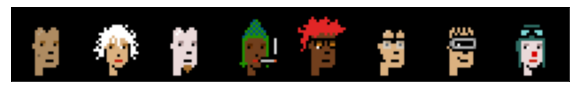

tensor([0., 1., 0., 0., 1., 0., 1., 1.])

In [113]:
#use their CIFAR code to check some of our images and labels.
dataiter = iter(trainloader)
images, labels = dataiter.next()


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images

plt.figure(figsize = (10, 10))
imshow(torchvision.utils.make_grid(images[11 : 19, :, :, :]))

# print labels
labels[11 : 19,0]

In [114]:
## Here's the sort of things we can do with the dataloaders
## basically iterate over the batches and it gives us stuff in
## the right format. Of course, this loop does nothing.
for i, data in enumerate(trainloader, 0):
  # get the inputs; data is a list of [inputs, labels]
  inputs, labels = data
[inputs.shape, labels.shape]

[torch.Size([100, 3, 24, 24]), torch.Size([100, 1])]

In [115]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        ## This has to be changed because the size
        ## of our inputs is different than the CFAR
        ## example. There's is 32x32 and ours is 24x24
        ## Also, I changed the rest of the network architecture
        ## here
        ## Finally, we only have one output.
        self.fc1 = nn.Linear(16 * 3 * 3, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
net = Net()

In [116]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=144, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [117]:
net(inputs).shape

torch.Size([100, 1])

In [118]:
import torch.optim as optim
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [119]:
for epoch in range(52):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
#        if i % 2000 == 1999:    # print every 2000 mini-batches
#            print('[%d, %5d] loss: %.3f' %
#                  (epoch + 1, i + 1, running_loss / 2000))
#            running_loss = 0.0

print('Finished Training')

Finished Training


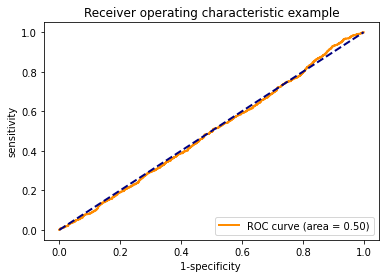

In [154]:
## Run the testing data through the NN
testout = net(torch.Tensor(x_test)).detach().numpy()

## Compare with the testing labels
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, testout)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-specificity ')
plt.ylabel('sensitivity')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [155]:
print("test set AUC:",roc_auc)

test set AUC: 0.4959656436440166


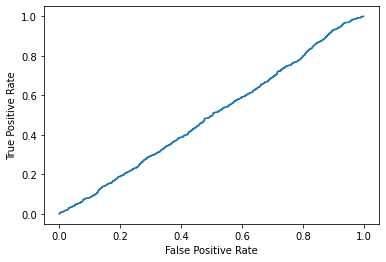

In [156]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [147]:
testout

array([[0.5056761 ],
       [0.5046836 ],
       [0.50236624],
       ...,
       [0.50254655],
       [0.50170094],
       [0.5064032 ]], dtype=float32)

#Validation sets:

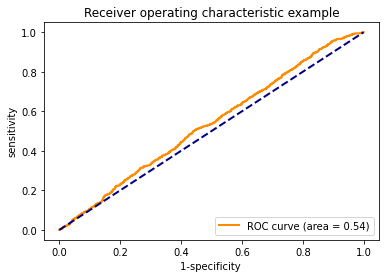

In [157]:
## Run the testing data through the NN
testout = net(torch.Tensor(x_valid)).detach().numpy()

## Compare with the valid labels
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, testout)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('1-specificity ')
plt.ylabel('sensitivity')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [158]:
print("validation set AUC:", roc_auc)

validation set AUC: 0.5352555630720433


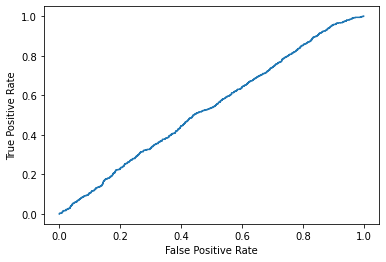

In [159]:


roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Question 2

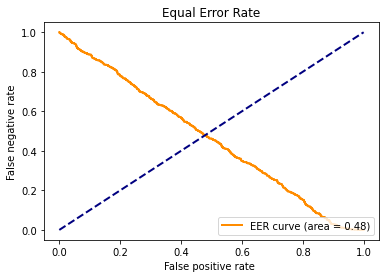

In [82]:
##Q2
from scipy.optimize import brentq
from sklearn.metrics import roc_curve
from scipy.interpolate import interp1d
##testing set
testout = net(torch.Tensor(x_test)).detach().numpy()
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, testout)
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

plt.figure()
## TPR + FNR = 1
lw = 2
plt.plot(fpr, 1-tpr, color='darkorange',
         lw=lw, label='EER curve (area = %0.2f)' % eer)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate ')
plt.ylabel('False negative rate')
plt.title('Equal Error Rate')
plt.legend(loc="lower right")
plt.show()

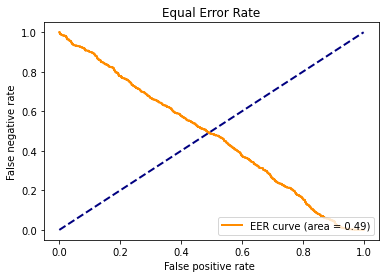

In [83]:
##validation set
testout = net(torch.Tensor(x_valid)).detach().numpy()
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid, testout)
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

plt.figure()
lw = 2
## TPR + FNR = 1
plt.plot(fpr, 1-tpr, color='darkorange',
         lw=lw, label='EER curve (area = %0.2f)' % eer)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate ')
plt.ylabel('False negative rate')
plt.title('Equal Error Rate')
plt.legend(loc="lower right")
plt.show()


 Visualize some of your algorithm's mistakes (in both directions) and describe what is happening. In other words, consider punks declared very likely to have a cancer that did not and ones that did not have a cancer that it declared very likely that they did. Plot those. 
 
From the plot we can see the EER curve area=0.48 for testing set and 0.49 for validation set, indicating poor performance.

 Is there a reason why it seems like it's so wrong for these cases?
One reason is that we trained a complex NN models and did not use external validation?

Q3. Create a python function that takes in an np image array just like the cancerpunks one below and gives probabilities that that punk has this disease.

In [122]:


def cancer(i,j):
     a, b = 24 * i, 24 * (i + 1)  
     c, d = 24 * j, 24 * (j + 1)
     idx = j + i * (100)
     cancerpunks[idx,0,:,:]=imgArray[a:b,c:d,0]
     cancerpunks[idx,1,:,:]=imgArray[a:b,c:d,1]
     cancerpunks[idx,2,:,:]=imgArray[a:b,c:d,2]
     pro_x = net(torch.Tensor(cancerpunks)).detach().numpy().mean()
  
     print(pro_x)


In [124]:
cancer(11,2)

0.73744434
